### This jupyter file contains some temp codes for plotting and testing

## Plot results as a function of capacity factor

### Create tabulated results for plotting

In [2]:
import pandas as pd
import numpy as np
import os
from projdirs import datadir #load the path that contains the data files 
from PACKAGE.optimisation import Optimise
from PACKAGE.component_model import pv_gen, wind_gen, SolarResource, WindSource,WindSource_windlab
# Set the location

#Newman
Newman = [-23.35, 119.75]
Sydney = [-33.856784, 151.215297]
Tom_Price = [-22.69, 117.79]
Port_Augusta = [-32.49, 137.77]
Whyalla = [-33.04, 137.59]
Pinjarra = [-32.63, 115.87]
Gladstone = [-23.84, 151.25]
Burnie = [-41.05, 145.91]

# Get wind and solar data for the designated location
# WindSource(Lat, Lon)
# SolarResource(Lat,Lon)


#Choose the location
Location = 'Darwin' 

#Update the weather data files
SolarResource(Location)

# # WindSource(Location)
WindSource_windlab(Location)

Solar data file was generated from Solcast database!
Wind source data file was generated from Windlab database!


In [3]:
pv_ref = 1e3 #(kW)
list(np.trunc(100*np.array(pv_gen(pv_ref)))/100)

# wind_ref = 320e3 #(kW)
# wind_ref_pout = list(np.trunc(100*np.array(wind_gen()))/100)

# print('wind capacity=',sum(wind_ref_pout)/(wind_ref*8760) )
# print('PV capacity=',sum(pv_ref_pout)/(pv_ref*8760) )

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 20.46,
 431.87,
 614.49,
 650.55,
 613.11,
 678.77,
 675.49,
 679.02,
 491.96,
 135.75,
 48.48,
 40.21,
 5.52,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 20.0,
 351.38,
 652.71,
 703.05,
 737.88,
 746.12,
 744.05,
 736.58,
 715.94,
 685.75,
 524.46,
 165.88,
 9.82,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 16.26,
 210.06,
 403.6,
 685.28,
 664.5,
 647.38,
 738.46,
 659.5,
 556.82,
 435.34,
 226.04,
 75.89,
 6.04,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 18.99,
 298.08,
 428.4,
 681.95,
 694.96,
 725.41,
 729.03,
 645.79,
 708.36,
 669.82,
 556.97,
 280.59,
 11.53,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 14.0,
 257.65,
 544.41,
 356.88,
 575.1,
 723.15,
 730.8,
 689.81,
 643.28,
 626.19,
 533.21,
 316.72,
 14.09,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 14.22,
 468.21,
 647.95,
 700.41,
 715.57,
 725.67,
 722.23,
 714.77,
 696.68,

# Generate results vs Capacity Factor

In [ ]:
import numpy as np

def AUD2USD(value):
    return(0.746 * value)



UG_storage = {'Lined Rock':154, 'Salt Cavern':20} #initial guess at 100T of H2 capacity
storage_type = 'Lined Rock'

# refine the cost of storage
from numpy import log10


def c_hs(hs_max):
    if hs_max > 0:
        x = log10(hs_max)
        if hs_max > 100:
            if storage_type == 'Salt Cavern':
                cost=10 ** (0.212669*x**2 - 1.638654*x + 4.403100)
                if hs_max > 8000:
                    cost = 17.66
            elif storage_type == 'Lined Rock':
                cost =10 ** (   0.217956*x**2 - 1.575209*x + 4.463930  )
                if hs_max > 4000:
                    cost = 41.48
        else:
            cost = 10 ** (-0.0285*x + 2.7853)
    else:
        cost = 516
    return(cost)


for Location in ['Burnie']:
    weather_data_file = 'weather_data_%s.csv'%(Location)
    SolarResource_solcast(weather_data_file)
    WindSource_solcast(weather_data_file)


    pv_ref = 1e3 #(kW)
    pv_ref_pout = list(np.trunc(100*np.array(pv_gen(pv_ref)))/100)

    wind_ref = 320e3 #(kW)
    wind_ref_pout = list(np.trunc(100*np.array(wind_gen()))/100)

  


    RESULTS = pd.DataFrame(columns=['cf','capex[USD]','pv_capacity[kW]',
                                    'wind_capacity[kW]','el_capacity[kW]',
                                    'ug_capcaity[kgH2]','pipe_storage_capacity[kgH2]',
                                    'bat_e_capacity[kWh]','bat_p_capacity[kW]',
                                    'pv_cost[USD]', 'wind_cost[USD]','el_cost[USD]',
                                    'ug_storage_cost[USD]','pipe_storage_cost[USD]',
                                    'bat_cost[USD]', 'load[kg/s]'])

    for cf in range(50,110,10):
        # create a dictionary that contains the inputs for optimisation.
        #these inputs are used by make_dzn_file function to create an input text file called hydrogen_plant_data.dzn.
        initial_ug_capa = 110
        simparams = dict(DT = 1,#[s] time steps
                     EL_ETA = 0.70,       #efficiency of electrolyser
                     BAT_ETA_in = 0.95,   #charging efficiency of battery
                     BAT_ETA_out = 0.95,  #discharg efficiency of battery
                     C_PV = 1122,          #[USD/kW] unit cost of PV
                     C_WIND = 1455,           #[USD/kW] unit cost of Wind
                     C_EL = 1067,          #[USD/W] unit cost of electrolyser
                     C_UG_STORAGE = c_hs(initial_ug_capa),   #[$/kgH] unit cost of hydrogen storage
                     UG_STORAGE_CAPA_MAX = 1e10,   #maximum available salt caevern size (kg of H2)
                     C_PIPE_STORAGE = 516, #unit cost of line packing (USD/kg of H2)
                     PIPE_STORAGE_CAPA_MIN = 100e3, #minimum size of linepacking (kg of H2)
                     C_BAT_ENERGY = 196,        #[USD/kWh] unit cost of battery energy storage
                     C_BAT_POWER = 405,        #[USD/kW] unit cost of battery power capacpity
                     CF = cf/100,           #capacity factor
                     LOAD = [5 for i in range(len(pv_ref_pout))])       #[kgH2/s] load profile timeseries

        #run the optimisation function and get the results in a dictionary:
        results = optimise(simparams)
        print(simparams['CF'])
        new_ug_capa = results['ug_storage_capa'][0]/1e3
        if np.mean([new_ug_capa,initial_ug_capa]) > 0:
            if abs(new_ug_capa - initial_ug_capa)/np.mean([new_ug_capa,initial_ug_capa]) > 0.05:
                initial_ug_capa = new_ug_capa
                print('new storage capa=', initial_ug_capa)
                simparams['C_UG_STORAGE'] = c_hs(new_ug_capa)
                results = optimise(simparams)

        RESULTS = RESULTS.append({'cf': simparams['CF'],
                                  'capex[USD]': results['CAPEX'][0],
                                  'pv_capacity[kW]': results['pv_max'][0],
                                  'wind_capacity[kW]': results['wind_max'][0],
                                  'el_capacity[kW]': results['el_max'][0],
                                  'ug_capcaity[kgH2]': results['ug_storage_capa'][0],
                                  'pipe_storage_capacity[kgH2]': results['pipe_storage_capa'][0],
                                  'bat_e_capacity[kWh]': results['bat_e_capa'][0],
                                  'bat_p_capacity[kW]': results['bat_p_max'][0],
                                  'pv_cost[USD]': results['pv_max'][0]*simparams['C_PV'],
                                  'wind_cost[USD]': results['wind_max'][0]*simparams['C_WIND'],
                                  'el_cost[USD]': results['el_max'][0]*simparams['C_EL'],
                                  'ug_storage_cost[USD]': results['ug_storage_capa'][0]*simparams['C_UG_STORAGE'],
                                  'pipe_storage_cost[USD]':results['pipe_storage_capa'][0]*simparams['C_PIPE_STORAGE'],
                                  'bat_cost[USD]': results['bat_p_max'][0]*simparams['C_BAT_ENERGY'],
                                  'load[kg/s]':results['LOAD'][0] }, ignore_index=True)


    print (
            'CAPEX = %0.2f [USD]' %( results['CAPEX'][0] ),'\n'
            'PV rated capacity  = %0.2f [kW]' %( results['pv_max'][0] ),'\n'  
            'Wind rated capacity = %0.2f [kW]' %( results['wind_max'][0] ),'\n'    
            'Electrolyser rated capacity = %0.4f [kW]' %( results['el_max'][0] ),'\n'  
            'Hydrogen storage capacity = %0.2f [kg of H2]' %( results['ug_storage_capa'][0] ),'\n'
            'Pipe storage capacity = %0.2f [kg of H2]' %( results['pipe_storage_capa'][0] ),'\n'
            'Battery energy capacity = %0.2f [kWh]' %( results['bat_e_capa'][0]  ),'\n'  
            'Battery power capcity = %0.2f [kW]' %( results['bat_p_max'][0] )
            )
    
    
    path_to_file = r'C:\Nextcloud\HILT-CRC---Green-Hydrogen\DATA\OPT_OUTPUTS'
    result_file = r'\results_vs_CapacityFactor(%s-Lined Rock cavern)_2020.csv'%(Location) 
    # existing_results = pd.read_csv(path_to_file+result_file)
    # existing_results.append(RESULTS,ignore_index=True)
    RESULTS.to_csv(path_to_file+result_file, index=False)


# Plot vs CF

In [ ]:
import plotly.express as px

results_toplot= RESULTS.rename(columns = {"pv_cost[USD]":"PV Cost", "wind_cost[USD]":"Wind Cost",
                                        "el_cost[USD]":"Electrolyser Cost",
                                        'ug_storage_cost[USD]':'UG H2 Storage Cost',
                                          'pipe_storage_cost[USD]':'Pipe Storage Cost',
                                          'bat_cost[USD]': 'Battery Cost'})

fig = px.bar(results_toplot,
             x="cf",
             y=["PV Cost", "Wind Cost",
                 "Electrolyser Cost",
                'Pipe Storage Cost',
                 'UG H2 Storage Cost',
                'Battery Cost'],
         
            )


fig.update_xaxes(title_text = "Capacity Factor",showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_yaxes(title_text='CAPEX [USD]',showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=False, gridwidth=1, gridcolor='gray', dtick=0.1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_layout(legend=dict(title=None),
                  margin=dict(l=10, r=10, t=10, b=10),
                  width=500, height=200,
                  plot_bgcolor='white',
                  legend_traceorder="reversed"
                 )

path = r'C:\Users\Ahmad Mojiri\OneDrive - Australian National University\HILT CRC\Hydrogen supply HILTCRC\Pictures'
# fig.write_image(path + r'\capex_vs_cf_other.png',scale=2)
fig.show()

# plot storage vs capacity factor

In [ ]:
import plotly.express as px
results_toplot= RESULTS.rename(columns = {"pv_cost[USD]":"PV Cost", "wind_cost[USD]":"Wind Cost",
                                        "el_cost[USD]":"Electrolyser Cost",
                                        'UG H2 Storage Cost':'UG H2 Storage Cost',
                                          'pipe_storage_cost[USD]':'Pipe Storage Cost',
                                          'bat_cost[USD]': 'Battery Cost',
                                         'pipe_storage_capacity[kgH2]':'Pipe capacity',
                                         'ug_capcaity[kgH2]':'UG capacity'}).copy()

fig = px.bar(results_toplot, x="cf",
             y=['Pipe capacity','UG capacity'],
            )


fig.update_xaxes(title_text = "Capacity Factor",showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_yaxes(title_text='kg of H<sub>2</sub>',showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=False, gridwidth=1, gridcolor='gray',dtick=0.1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_layout(legend=dict(title=None),
                  margin=dict(l=10, r=10, t=10, b=10),
                  width=500, height=200,
                  plot_bgcolor='white',
                  legend_traceorder="reversed"
                 )

path = r'C:\Users\Ahmad Mojiri\OneDrive - Australian National University\HILT CRC\Hydrogen supply HILTCRC\Pictures'
# fig.write_image(path + r'\HS_vs_cf_other.png',scale=2)
fig.show()

# plot PV rated power vs CF

In [ ]:
import plotly.express as px

results_toplot['pv_capacity[kW]'] = RESULTS['pv_capacity[kW]']/1e3
fig = px.bar(results_toplot, x="cf", y='pv_capacity[kW]',
            )


fig.update_xaxes(title_text = "Capacity Factor",showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_yaxes(title_text='PV rated power [MW]',showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=False, gridwidth=1, gridcolor='gray', dtick=0.1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_layout(legend=dict(title=None),
                  margin=dict(l=10, r=10, t=10, b=10),
                  width=400, height=200,
                  plot_bgcolor='white',
                  legend_traceorder="reversed"
                 )

path = r'C:\Users\Ahmad Mojiri\OneDrive - Australian National University\HILT CRC\Hydrogen supply HILTCRC\Pictures'
# fig.write_image(path + r'\pv_vs_cf_other.png',scale=2)
fig.show()

# plot wind capacity vs CF

In [ ]:
import plotly.express as px

results_toplot['wind_capacity[kW]'] = RESULTS['wind_capacity[kW]']/1e3
fig = px.bar(results_toplot, x="cf", y='wind_capacity[kW]',
            )


fig.update_xaxes(title_text = "Capacity Factor",showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_yaxes(title_text='Wind rated power [MW]',showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=False, gridwidth=1, gridcolor='gray', dtick=0.1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_layout(legend=dict(title=None),
                  margin=dict(l=10, r=10, t=10, b=10),
                  width=400, height=250,
                  plot_bgcolor='white',
                  legend_traceorder="reversed"
                 )

path = r'C:\Users\Ahmad Mojiri\OneDrive - Australian National University\HILT CRC\Hydrogen supply HILTCRC\Pictures'
# fig.write_image(path + r'\wind_vs_cf_other.png',scale=2)
fig.show()

# plot electrolyser rated power vs CF

In [ ]:
import plotly.express as px


results_toplot['el_capacity[kW]'] = RESULTS['el_capacity[kW]']/1e3
fig = px.bar(results_toplot, x="cf", y='el_capacity[kW]',
            )


fig.update_xaxes(title_text = "Capacity Factor",showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_yaxes(title_text='Electrolyser [MW]',showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=False, gridwidth=1, gridcolor='gray',dtick=0.1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_layout(legend=dict(title=None),
                  margin=dict(l=10, r=10, t=10, b=10),
                  width=400, height=250,
                  plot_bgcolor='white',
                  legend_traceorder="reversed"
                 )

path = r'C:\Users\Ahmad Mojiri\OneDrive - Australian National University\HILT CRC\Hydrogen supply HILTCRC\Pictures'
# fig.write_image(path + r'\el_vs_cf_other.png',scale=2)
fig.show()

In [ ]:
import plotly.express as px
RESULTS = RESULTS_original.copy()

RESULTS.bat_e_capacity = RESULTS.bat_e_capacity/3.6e9
fig = px.bar(RESULTS, x="cf", y='bat_e_capacity',
            )


fig.update_xaxes(title_text = "Capacity Factor",showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_yaxes(title_text='Battery [MWh]',showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=False, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_layout(legend=dict(title=None),
                  margin=dict(l=10, r=10, t=10, b=10),
                  width=400, height=200,
                  plot_bgcolor='white',
                  legend_traceorder="reversed"
                 )

path = r'C:\Users\Ahmad Mojiri\OneDrive - Australian National University\HILT CRC\Hydrogen supply HILTCRC\Pictures'
# fig.write_image(path + r'\bate_vs_cf.png',scale=2)
fig.show()

# Plot vs wind price

In [ ]:
import plotly.express as px
RESULTS = RESULTS_original.copy()
RESULTS.rename(columns = {"pv_cost":"PV Cost", "wind_cost":"Wind Cost",
                        "elec_cost":"Electrolyser Cost",
                        'hs_cost':'H2 Storage Cost','bat_cost': 'Battery Cost'}, inplace=True )

fig = px.bar(RESULTS, x="wm", y=["PV Cost", "Wind Cost",
                                 "Electrolyser Cost",
                                 'H2 Storage Cost', 'Battery Cost'],
            )


fig.update_xaxes(title_text = "Multiplier",showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_yaxes(title_text='CAPEX [USD]',showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=False, gridwidth=1, gridcolor='gray',dtick=1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_layout(legend=dict(title=None),
                  margin=dict(l=10, r=10, t=10, b=10),
                  width=500, height=200,
                  plot_bgcolor='white',
                  legend_traceorder="reversed"
                 )

path = r'C:\Users\Ahmad Mojiri\OneDrive - Australian National University\HILT CRC\Hydrogen supply HILTCRC\Pictures'
fig.write_image(path + r'\capex_vs_wm.png',scale=2)
fig.show()

In [ ]:
import plotly.express as px
RESULTS = RESULTS_original.copy()
RESULTS.rename(columns = {"pv_cost":"PV Cost", "wind_cost":"Wind Cost",
                        "elec_cost":"Electrolyser Cost",
                        'hs_cost':'H2 Storage Cost','bat_cost': 'Battery Cost'}, inplace=True )

fig = px.bar(RESULTS, x="wm", y='h2_capcaity',
            )


fig.update_xaxes(title_text = "Multiplier",showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_yaxes(title_text='kg of H<sub>2</sub>',showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=False, gridwidth=1, gridcolor='gray',dtick=1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_layout(legend=dict(title=None),
                  margin=dict(l=10, r=10, t=10, b=10),
                  width=400, height=200,
                  plot_bgcolor='white',
                  legend_traceorder="reversed"
                 )

path = r'C:\Users\Ahmad Mojiri\OneDrive - Australian National University\HILT CRC\Hydrogen supply HILTCRC\Pictures'
fig.write_image(path + r'\HS_vs_wm.png',scale=2)
fig.show()

In [ ]:
import plotly.express as px
RESULTS = RESULTS_original.copy()

RESULTS.pv_capacity = RESULTS.pv_capacity/1e6
fig = px.bar(RESULTS, x="wm", y='pv_capacity',
            )


fig.update_xaxes(title_text = "Multiplier",showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_yaxes(title_text='PV rated power [MW]',showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=False, gridwidth=1, gridcolor='gray', dtick=1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_layout(legend=dict(title=None),
                  margin=dict(l=10, r=10, t=10, b=10),
                  width=400, height=200,
                  plot_bgcolor='white',
                  legend_traceorder="reversed"
                 )

path = r'C:\Users\Ahmad Mojiri\OneDrive - Australian National University\HILT CRC\Hydrogen supply HILTCRC\Pictures'
fig.write_image(path + r'\pv_vs_wm.png',scale=2)
fig.show()

In [ ]:
import plotly.express as px
RESULTS = RESULTS_original.copy()

RESULTS.wind_capacity = RESULTS.wind_capacity/1e6
fig = px.bar(RESULTS, x="wm", y='wind_capacity',
            )


fig.update_xaxes(title_text = "Multiplier",showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_yaxes(title_text='Wind rated power [MW]',showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=False, gridwidth=1, gridcolor='gray',dtick=1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_layout(legend=dict(title=None),
                  margin=dict(l=10, r=10, t=10, b=10),
                  width=400, height=200,
                  plot_bgcolor='white',
                  legend_traceorder="reversed"
                 )

path = r'C:\Users\Ahmad Mojiri\OneDrive - Australian National University\HILT CRC\Hydrogen supply HILTCRC\Pictures'
fig.write_image(path + r'\wind_vs_wm.png',scale=2)
fig.show()

In [ ]:
import plotly.express as px
RESULTS = RESULTS_original.copy()

RESULTS.elec_capacity = RESULTS.elec_capacity/1e6
fig = px.bar(RESULTS, x="wm", y='elec_capacity',
            )


fig.update_xaxes(title_text = "Multiplier",showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_yaxes(title_text='Electrolyser [MW]',showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=False, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_layout(legend=dict(title=None),
                  margin=dict(l=10, r=10, t=10, b=10),
                  width=400, height=200,
                  plot_bgcolor='white',
                  legend_traceorder="reversed"
                 )

path = r'C:\Users\Ahmad Mojiri\OneDrive - Australian National University\HILT CRC\Hydrogen supply HILTCRC\Pictures'
fig.write_image(path + r'\el_vs_wm.png',scale=2)
fig.show()

In [ ]:
import plotly.express as px
RESULTS = RESULTS_original.copy()

RESULTS.bat_e_capacity = RESULTS.bat_e_capacity/3.6e9
fig = px.bar(RESULTS, x="wm", y='bat_e_capacity',
            )


fig.update_xaxes(title_text = "Multiplier",showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_yaxes(title_text='Battery [MWh]',showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=False, gridwidth=1, gridcolor='gray',dtick=1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_layout(legend=dict(title=None),
                  margin=dict(l=10, r=10, t=10, b=10),
                  width=400, height=200,
                  plot_bgcolor='white',
                  legend_traceorder="reversed"
                 )

path = r'C:\Users\Ahmad Mojiri\OneDrive - Australian National University\HILT CRC\Hydrogen supply HILTCRC\Pictures'
fig.write_image(path + r'\bate_vs_wm.png',scale=2)
fig.show()

# Plot vs battery price

In [ ]:
import plotly.express as px
RESULTS = RESULTS_original.copy()
RESULTS.rename(columns = {"pv_cost":"PV Cost", "wind_cost":"Wind Cost",
                        "elec_cost":"Electrolyser Cost",
                        'hs_cost':'H2 Storage Cost','bat_cost': 'Battery Cost'}, inplace=True )

fig = px.bar(RESULTS, x="bp", y=["PV Cost", "Wind Cost",
                                 "Electrolyser Cost",
                                 'H2 Storage Cost', 'Battery Cost'],
            )


fig.update_xaxes(title_text = "Battery price [USD/kWh]",showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_yaxes(title_text='CAPEX [USD]',showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=False, gridwidth=1, gridcolor='gray', dtick=0.1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_layout(legend=dict(title=None),
                  margin=dict(l=10, r=10, t=10, b=10),
                  width=500, height=200,
                  plot_bgcolor='white',
                  legend_traceorder="reversed"
                 )

path = r'C:\Users\Ahmad Mojiri\OneDrive - Australian National University\HILT CRC\Hydrogen supply HILTCRC\Pictures'
fig.write_image(path + r'\capex_vs_cf.png',scale=2)
fig.show()

# Modify the TMY data received from Alastair

In [ ]:
import pandas as pd
import os
Path = r'C:\SVN-ANU\HILT-CRC\WEATHER DATA\TMY DATA for H2 HUBS\\'
files = os.listdir(Path)

for File in files:
    WD = pd.read_csv(Path+File)
    WD['date_time'] = pd.to_datetime(WD.PeriodStart)
    WD['Year'] = WD.date_time.dt.year
    WD['Month'] = WD.date_time.dt.month
    WD['Day'] = WD.date_time.dt.day
    WD['Hour'] = WD.date_time.dt.hour
    WD['Minute'] = WD.date_time.dt.minute
    WD.drop(['date_time','PeriodEnd','PeriodStart'],axis=1,inplace=True)
    WD = WD[['Year', 'Month', 'Day', 'Hour', 'Minute',
            'AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi',
           'Dni', 'Ebh', 'Ghi',
           'SnowWater', 'SurfacePressure', 'WindDirection10m', 'WindSpeed10m',
           'Zenith' ]].copy()

    WD.rename(columns={'AirTemp':'Temperature',
                       'CloudOpacity':'Cloud Opacity',
                       'DewpointTemp':'Dew Point',
                       'Dhi':'DHI',
                       'Dni':'DNI',
                       'Ebh':'EBH',
                       'Ghi':'GHI',
                       'SnowWater':'Snow Depth',
                       'SurfacePressure':'Pressure',
                       'WindDirection10m':'Wind Direction',
                       'WindSpeed10m':'Wind Speed'},inplace=True)

    target_path = r'C:\Nextcloud\HILT-CRC---Green-Hydrogen\DATA\SAM INPUTS\WEATHER_DATA\\'
    Header = pd.read_csv(target_path+'weather_data.csv',nrows=1)
    Header.lat = float(File.split(' ')[3])
    Header.lon = float(File.split(' ')[4])
    Header.state = File.split(' ')[0]
    Header.country='Australia'

    with open(target_path+'weather_data_%s.csv'%(File.split(' ')[0]),'w', newline='') as f:
            Header.to_csv(f,index=False)
            f.write("")
            WD.to_csv(f,index=False)
            f.write("")
    f.close()

# Modify Solcast weather data timeseries

In [73]:
import pandas as pd
import os
solcast_folder = r'C:\\TEMP\\Weather data\\'
files = os.listdir(solcast_folder)

for File in files:
    WD = pd.read_csv(solcast_folder+File,skiprows=9)
    WD = WD.drop(0,axis=0)
    WD = WD[['Year', 'Month', 'Day', 'Hour', 'Minute',
            'Tamb', 'Azimuth', 'Cloudopacity', 'DewPoint', 'DHI',
            'DNI', 'EBH', 'GHI',
            'SnowDepth', 'Pressure', 'WindDir', 'WindVel',
            'Zenith' ]].copy()

    WD.rename(columns={'Tamb':'Temperature',
                       'Cloudopacity':'Cloud Opacity',
                       'DewPoint':'Dew Point',
                       'SnowDepth':'Snow Depth',
                       'WindDir':'Wind Direction',
                       'WindVel':'Wind Speed'},inplace=True)

    target_path = r'C:\Nextcloud\HILT-CRC---Green-Hydrogen\DATA\SAM_INPUTS\WEATHER_DATA\Data sources\Solcast data\\'
    template_path = r'C:\Nextcloud\HILT-CRC---Green-Hydrogen\DATA\SAM_INPUTS\WEATHER_DATA\\'
    Header = pd.read_csv(template_path+'weather_data_Burnie.csv',nrows=1)
#     Header.lat = float(File.split('_')[1])
#     Header.lon = float(File.split('_')[2].replace('.csv',''))
#     Header.label = File.split('_')[0]
#     Header.timezone = 
#     Header.country='Australia'
    
    header = pd.read_csv(solcast_folder+File,nrows=8,skiprows=1, header=None)
    header[0] = header[0].str.replace('#','')
    header[1] = header[1].str.replace(' ','')
    header = header.set_index(0).T
    
    Header.lat = header.Latitude.values[0]
    Header.lon = header.Longitude.values[0]
    Header.label = File.split('_')[0]
    Header.timezone = header['Time Zone'].values[0]
    Header.country='Australia'
    
    
    
    with open(target_path+'weather_data_%s.csv'%(File.split('_')[0]),'w', newline='') as f:
            Header.to_csv(f,index=False)
            f.write("")
            WD.to_csv(f,index=False)
            f.write("")
    f.close()

### Parallel processing of results vs CF

In [ ]:
import numpy as np

def AUD2USD(value):
    return(0.746 * value)



UG_storage = {'Lined Rock':154, 'Salt Cavern':20} #initial guess at 100T of H2 capacity
storage_type = 'Lined Rock'

# refine the cost of storage
from numpy import log10


def c_hs(hs_max):
    if hs_max > 0:
        x = log10(hs_max)
        if hs_max > 100:
            if storage_type == 'Salt Cavern':
                cost=10 ** (0.212669*x**2 - 1.638654*x + 4.403100)
                if hs_max > 8000:
                    cost = 17.66
            elif storage_type == 'Lined Rock':
                cost =10 ** (   0.217956*x**2 - 1.575209*x + 4.463930  )
                if hs_max > 4000:
                    cost = 41.48
        else:
            cost = 10 ** (-0.0285*x + 2.7853)
    else:
        cost = 516
    return(cost)


cf in range(50,110,10):

def greenH2(cf): 
    initial_ug_capa = 110
    simparams = dict(DT = 1,#[s] time steps
                 EL_ETA = 0.70,       #efficiency of electrolyser
                 BAT_ETA_in = 0.95,   #charging efficiency of battery
                 BAT_ETA_out = 0.95,  #discharg efficiency of battery
                 C_PV = AUD2USD(1505),          #[USD/kW] unit cost of PV
                 C_WIND = AUD2USD(1951),           #[USD/kW] unit cost of Wind
                 C_EL = 1067,          #[USD/W] unit cost of electrolyser
                 C_UG_STORAGE = c_hs(initial_ug_capa),   #[$/kgH] unit cost of hydrogen storage
                 UG_STORAGE_CAPA_MAX = 1e10,   #maximum available salt caevern size (kg of H2)
                 C_PIPE_STORAGE = 516, #unit cost of line packing (USD/kg of H2)
                 PIPE_STORAGE_CAPA_MIN = 100e3, #minimum size of linepacking (kg of H2)
                 C_BAT_ENERGY = 196,        #[USD/kWh] unit cost of battery energy storage
                 C_BAT_POWER = 405,        #[USD/kW] unit cost of battery power capacpity
                 CF = cf/100,           #capacity factor
                 PV_REF = pv_ref,    #capacity of reference PV plant (kW)
                 PV_REF_POUT = pv_ref_pout,           #power output from reference PV plant (kW)
                 WIND_REF = wind_ref,      #capacity of reference wind farm (kW)
                 WIND_REF_POUT = wind_ref_pout,        #power output from the reference wind farm (kW)
                 LOAD = [5 for i in range(len(pv_ref_pout))])       #[kgH2/s] load profile timeseries

    #run the optimisation function and get the results in a dictionary:
    results = optimise(simparams)
    print(simparams['CF'])
    new_ug_capa = results['ug_storage_capa'][0]/1e3
    if np.mean([new_ug_capa,initial_ug_capa]) > 0:
        if abs(new_ug_capa - initial_ug_capa)/np.mean([new_ug_capa,initial_ug_capa]) > 0.05:
            initial_ug_capa = new_ug_capa
            print('new storage capa=', initial_ug_capa)
            simparams['C_UG_STORAGE'] = c_hs(new_ug_capa)
            results = optimise(simparams)

    return(results)

locations = ['Newman', 'Tom_Price', 'Port_Augusta',
             'Whyalla', 'Pinjarra', 'Gladstone', 'Burnie']

for Location in locations:
    weather_data_file = 'weather_data_%s.csv'%(Location)
    SolarResource_solcast(weather_data_file)
    WindSource_solcast(weather_data_file)


    pv_ref = 1e3 #(kW)
    pv_ref_pout = list(np.trunc(100*np.array(pv_gen(pv_ref)))/100)

    wind_ref = 320e3 #(kW)
    wind_ref_pout = list(np.trunc(100*np.array(wind_gen()))/100)

  


    RESULTS = pd.DataFrame(columns=['cf','capex[USD]','pv_capacity[kW]',
                                    'wind_capacity[kW]','el_capacity[kW]',
                                    'ug_capcaity[kgH2]','pipe_storage_capacity[kgH2]',
                                    'bat_e_capacity[kWh]','bat_p_capacity[kW]',
                                    'pv_cost[USD]', 'wind_cost[USD]','el_cost[USD]',
                                    'ug_storage_cost[USD]','pipe_storage_cost[USD]',
                                    'bat_cost[USD]'])

    ########

        RESULTS = RESULTS.append({'cf': simparams['CF'],
                                  'capex[USD]': results['CAPEX'][0],
                                  'pv_capacity[kW]': results['pv_max'][0],
                                  'wind_capacity[kW]': results['wind_max'][0],
                                  'el_capacity[kW]': results['el_max'][0],
                                  'ug_capcaity[kgH2]': results['ug_storage_capa'][0],
                                  'pipe_storage_capacity[kgH2]': results['pipe_storage_capa'][0],
                                  'bat_e_capacity[kWh]': results['bat_e_capa'][0],
                                  'bat_p_capacity[kW]': results['bat_p_max'][0],
                                  'pv_cost[USD]': results['pv_max'][0]*simparams['C_PV'],
                                  'wind_cost[USD]': results['wind_max'][0]*simparams['C_WIND'],
                                  'el_cost[USD]': results['el_max'][0]*simparams['C_EL'],
                                  'ug_storage_cost[USD]': results['ug_storage_capa'][0]*simparams['C_UG_STORAGE'],
                                  'pipe_storage_cost[USD]':results['pipe_storage_capa'][0]*simparams['C_PIPE_STORAGE'],
                                  'bat_cost[USD]': results['bat_p_max'][0]*simparams['C_BAT_ENERGY'] }, ignore_index=True)


    print (
            'CAPEX = %0.2f [USD]' %( results['CAPEX'][0] ),'\n'
            'PV rated capacity  = %0.2f [kW]' %( results['pv_max'][0] ),'\n'  
            'Wind rated capacity = %0.2f [kW]' %( results['wind_max'][0] ),'\n'    
            'Electrolyser rated capacity = %0.4f [kW]' %( results['el_max'][0] ),'\n'  
            'Hydrogen storage capacity = %0.2f [kg of H2]' %( results['ug_storage_capa'][0] ),'\n'
            'Pipe storage capacity = %0.2f [kg of H2]' %( results['pipe_storage_capa'][0] ),'\n'
            'Battery energy capacity = %0.2f [kWh]' %( results['bat_e_capa'][0]  ),'\n'  
            'Battery power capcity = %0.2f [kW]' %( results['bat_p_max'][0] )
            )
    
    RESULTS['load[kg/s]'] = 5
    
    path_to_file = r'C:\Nextcloud\HILT-CRC---Green-Hydrogen\DATA\OPT_OUTPUTS'
    result_file = r'\results_vs_CapacityFactor(%s-Lined Rock cavern).csv'%(Location) 
    # existing_results = pd.read_csv(path_to_file+result_file)
    # existing_results.append(RESULTS,ignore_index=True)
    RESULTS.to_csv(path_to_file+result_file, index=False)


# Plot the selected locations for extracting wind sources

(93.2578972485585, 171.55709362354128, -45.47041327433196, -7.412245819916498)

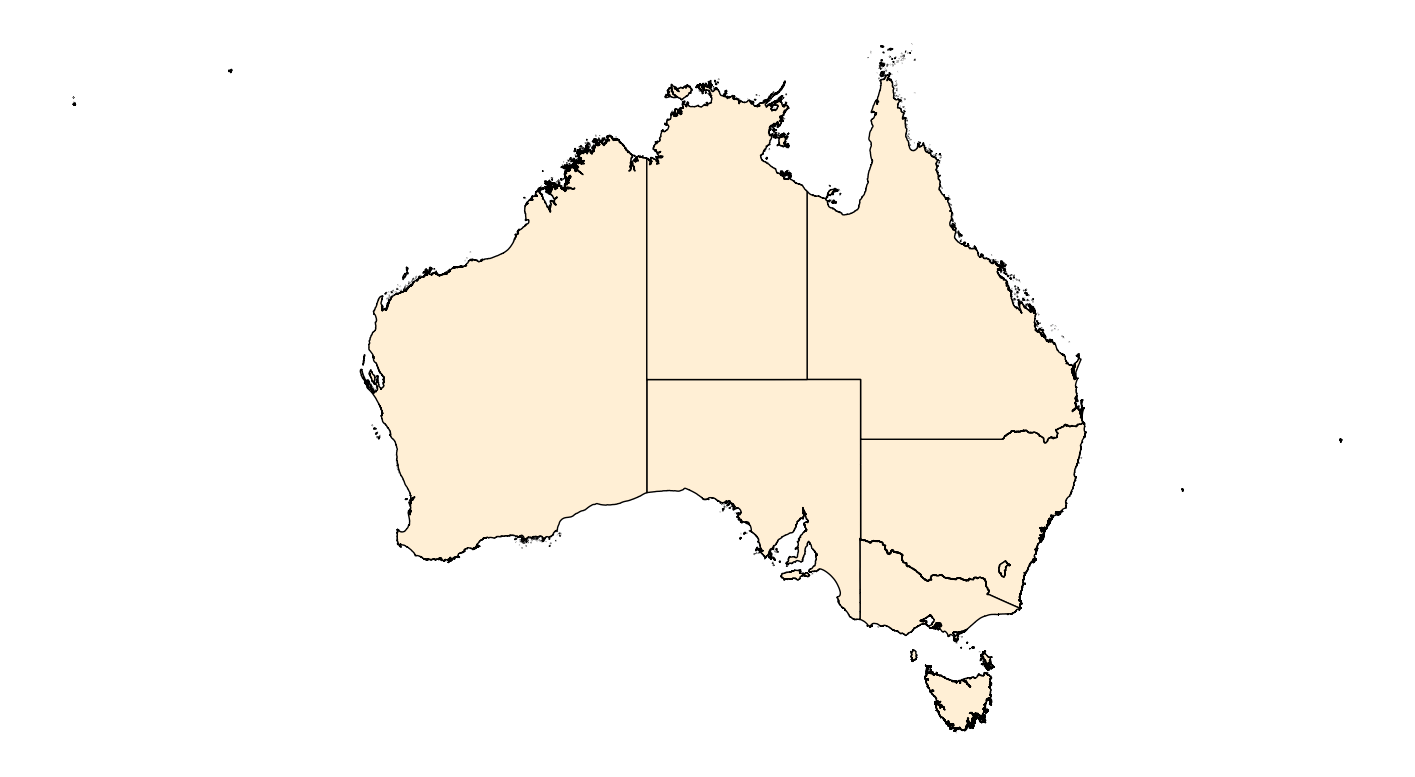

In [12]:
import pandas as pd
import geopandas as gpd
import zipfile
import requests
import io

shapes_url = f"https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/STE_2021_AUST_SHP_GDA2020.zip"
# # shapes_file = r'C:\Users\Ahmad Mojiri\Downloads\STE_2021_AUST_SHP_GDA2020.zip'
# shapes_gpd = gpd.read_file(shapes_url)

base = shapes_gpd.plot(color='papayawhip', edgecolor='k', figsize =(18,30))
base.axis('off')

# locations = pd.read_excel(r'C:\SVN-ANU\HILT-CRC\WEATHER DATA\WindLab - data\Wind farm locations.xlsx',
#                           sheet_name='Ranked list',
#                          )
# Locations = gpd.GeoDataFrame(locations, geometry=gpd.points_from_xy(locations.Longitude, locations.Latitude))

# Fig = Locations.plot(ax=base, marker='o', color='red', markersize=1, alpha=1)

# base.figure.savefig(r'C:\Users\Ahmad Mojiri\Downloads\locations.png',
#                    dpi=600, bbox_inches='tight',transparent=True)

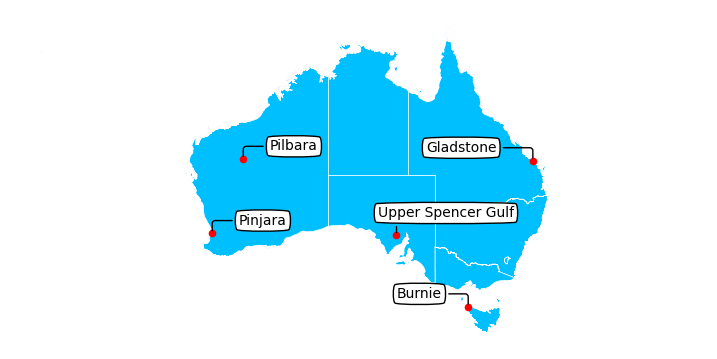

In [21]:
import matplotlib.pyplot as plt
import numpy as np
base = shapes_gpd.plot(color='deepskyblue',
                       edgecolor='white',
                       linewidth = 0.5,
                       figsize =(9,15),)
base.axis('off')

# df = pd.read_excel(r'C:\Nextcloud\HILT-CRC---Green-Hydrogen\DATA\Locations.xlsx')
df = pd.read_excel(r'C:\Nextcloud\HILT-CRC---Green-Hydrogen\DATA\Locations_Ye.xlsx')

df['loc_xy'] = list(zip(df.Longitude,df.Latitude))
df['text_xy'] = list(zip(df.Text_Long,df.Text_Lat))


greenH2 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))



Fig = greenH2.plot(ax=base, marker='o', color='red', markersize=20, alpha=1);
# color_set = {'Under development': 'lightsteelblue',
#              'Under construction': 'cornflowerblue',
#              'Operational': 'limegreen'}

for i in np.arange(0,len(df)): 
    XY_text = df.text_xy[i]
    XY_loc =  df.loc_xy[i]
#     color_selector = greenH2_df.Status[i]
    text = df.Site[i]
    bbox_props = dict(boxstyle="round4,pad=0.3", ec="black", lw=1,fc='white')#, fc=color_set[color_selector], )
    plt.annotate(text, xytext = XY_text,
                 xy = XY_loc, arrowprops = dict(arrowstyle="-",
#                                                 ls = 'dashed',
#                                                 connectionstyle="arc3",
                                               connectionstyle='angle,angleA=0,angleB=90,rad=3'),
                 bbox=bbox_props )

dy=0.07
y = 0.98
# for Key in list(color_set.keys()):
#     y = y-dy
#     plt.annotate(Key, xy = (0.78,y), xycoords='axes fraction',
#                   bbox= dict(boxstyle="round4,pad=0.3", fc=color_set[Key], ec="black", lw=1)
#                 )
    
# Fig.figure.savefig(r'C:\Users\Ahmad Mojiri\Downloads\locations_Ye.png',
#                    dpi=1000, bbox_inches='tight')
# Fig.show()

# Compare wind and PV output at two different locations

In [ ]:
pv_ref = 320e3 #(kW)
wind_ref = 320e3 #(kW)


Location = 'Pinjara 3' 
SolarResource(Location)
WindSource_windlab(Location)

pv_output_pinjara3 = pv_gen(pv_ref)
wind_output_pinjara3 = wind_gen()

Location = 'Pilbara 2' 
SolarResource(Location)
WindSource_windlab(Location)

pv_output_pilbara2 = pv_gen(pv_ref)
wind_output_pilbara2 = wind_gen()

data_plot = pd.DataFrame({'time':pd.date_range('2020-01-01', '2020-12-31',freq='H').tolist()[0:-1],
             'PV_Pinjara3': pv_output_pinjara3,
             'Wind_Pinjara3': wind_output_pinjara3,
             'PV_Pilbara2': pv_output_pilbara2,
             'Wind_Pilbara2': wind_output_pilbara2})

# Create figure
fig = make_subplots()
fig.add_trace(
    go.Scatter(x=list(data_plot.time), y=list(data_plot.PV_Pinjara3),
              line_shape='hv', name='PV_Pinjara3',
               line_color = 'orange', opacity= 0.5, yaxis="y1"),
                )

fig.add_trace(
    go.Scatter(x=list(data_plot.time), y=list(data_plot.Wind_Pinjara3*5e-3),
              line_shape='hv', name='Wind_Pinjara3',
               line_color = 'green', opacity= 0.5, yaxis="y1"),
                )

fig.add_trace(
    go.Scatter(x=list(data_plot.time), y=list(data_plot.PV_Pilbara2),
              line_shape='hv', name='PV_Pilbara2',
               line_color = 'red', opacity= 0.5, yaxis="y1"),
                )

fig.add_trace(
    go.Scatter(x=list(data_plot.time), y=list(data_plot.Wind_Pilbara2*5e-3),
              line_shape='hv', name='Wind_Pilbara2',
               line_color = 'blue', opacity= 0.5, yaxis="y1"),
                )



fig.update_layout(width=900, height=300,
                  margin=dict(l=0, r=0, t=20, b=0))

## List wind and PV cpacity factors for all alocation comparing solcast and windlab data

In [ ]:
import pandas as pd
import os
folder = r'C:\Nextcloud\HILT-CRC---Green-Hydrogen\DATA\SAM_INPUTS\WEATHER_DATA\\'
files = os.listdir(folder)[2:]

locations = [name.split('_')[2].replace('.csv','') for name in files]

# Wind_capa = ['Wind']
# PV_capa = ['PV']

# for Location in locations:
#     SolarResource(Location)
#     WindSource_windlab(Location)
    
#     pv_ref = 1e3 #(kW)
#     pv_ref_pout = list(np.trunc(100*np.array(pv_gen(pv_ref)))/100)

# #     wind_ref = 320e3 #(kW)
# #     wind_ref_pout = list(np.trunc(100*np.array(wind_gen()))/100)

# #     Wind_capa = Wind_capa + [(sum(wind_ref_pout))/(wind_ref*8760)]
#     PV_capa = PV_capa + [sum(pv_ref_pout)/(pv_ref*8760)]
    

# Create graphics for HILT CRC